In [1]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [2]:
file_path=os.path.join(os.getcwd(),"dataset","train.csv")

df = pd.read_csv(file_path)

In [3]:
df.head()

,Customer Id,Artist Name,Artist Reputation,Height,Width,Weight,Material,Price Of Sculpture,Base Shipping Price,International,Express Shipment,Installation Included,Transport,Fragile,Customer Information,Remote Location,Scheduled Date,Delivery Date,Customer Location,Cost
0,fffe3900350033003300,Billy Jenkins,0.26,17.0,6.0,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,0.28,3.0,3.0,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,0.07,8.0,5.0,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,0.12,9.0,NaN,NaN,Aluminium,5.81,16.31,No,No,No,NaN,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,0.15,17.0,6.0,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23


Duplicates

In [4]:
def remove_duplicates(df):
    """
    Remove duplicates from a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - DataFrame with duplicates removed
    """
    # Print the shape before removing duplicates
    print("Shape before removing duplicates:", df.shape)

    # Remove duplicates
    df_no_duplicates = df.drop_duplicates()

    # Print the shape after removing duplicates
    print("Shape after removing duplicates:", df_no_duplicates.shape)

    return df_no_duplicates


df=remove_duplicates(df=df)

Shape before removing duplicates: (6500, 20)
Shape after removing duplicates: (6500, 20)


## Data Overview

In [5]:
df.describe

<bound method NDFrame.describe of                Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

      Width     Weight   Mate

In [6]:
df.shape

(6500, 20)

Columns Lables

In [7]:
# Replace spaces with underscores in column labels
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [8]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

Unique Value percentage

Check Na values

Columns with Percentage of Missing Values:
Artist_Reputation: 11.54%
Height: 5.77%
Width: 8.98%
Weight: 9.03%
Material: 11.75%
Transport: 21.42%
Remote_Location: 11.86%


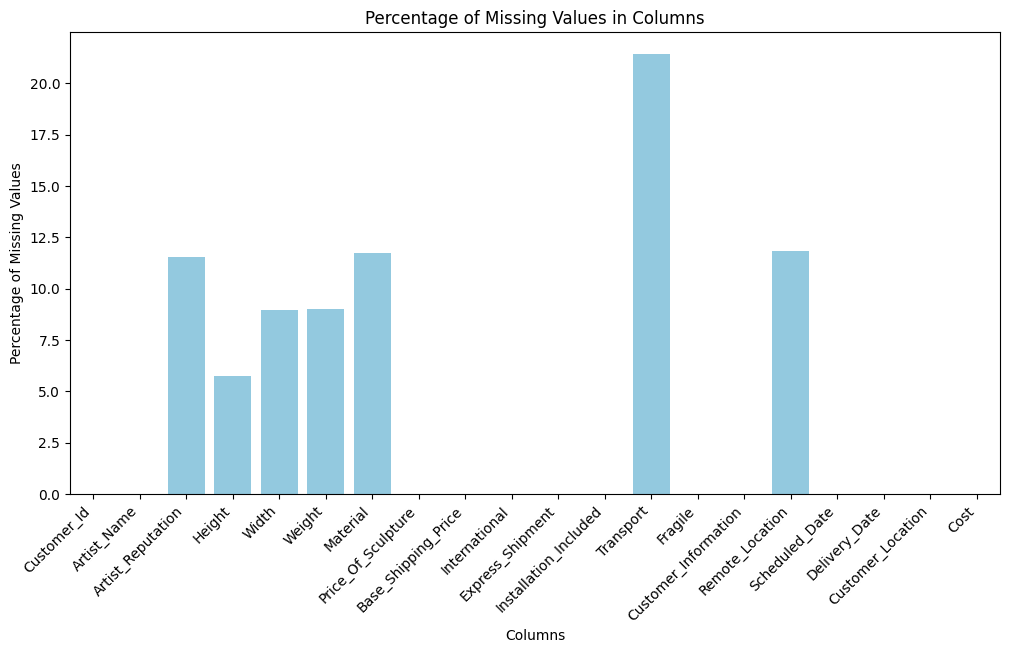

In [9]:
def plot_missing_values(df):
    """
    Plot missing values in the columns of a DataFrame and print columns with their percentage of missing values.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - None (displays the plot)
    """
    # Calculate the percentage of missing values in each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Print columns with their percentage of missing values
    print("Columns with Percentage of Missing Values:")
    for col, percentage in missing_percentage.items():
        if percentage != 0 :
            print(f"{col}: {percentage:.2f}%")

    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue')
    plt.title('Percentage of Missing Values in Columns')
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Missing Values')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

    
    
plot_missing_values(df=df)

Dropping rows with NO Material data as Available

In [10]:
# Drop rows with NaN values in the specified column
# Print the shape of the DataFrame before dropping rows with NaN values
print(f"Shape before dropping NaN values: {df.shape}")

# Drop rows with NaN values in the specified column
df = df.dropna(subset=["Material"])

# Print the shape of the DataFrame after dropping rows with NaN values
print(f"Shape after dropping NaN values: {df.shape}")

# Display the DataFrame after dropping rows with NaN values
print("\nDataFrame after dropping NaN values:")



Shape before dropping NaN values: (6500, 20)
Shape after dropping NaN values: (5736, 20)

DataFrame after dropping NaN values:


Filling Nan Values

In [261]:
df[["Artist_Reputation","Height","Width","Weight","Material","Transport","Remote_Location"]]

,Artist_Reputation,Height,Width,Weight,Material,Transport,Remote_Location
0,0.26,17.0,6.0,4128.0,Brass,Airways,No
1,0.28,3.0,3.0,61.0,Brass,Roadways,No
2,0.07,8.0,5.0,237.0,Clay,Roadways,Yes
3,0.12,9.0,NaN,NaN,Aluminium,NaN,Yes
4,0.15,17.0,6.0,324.0,Aluminium,Airways,No
...,...,...,...,...,...,...,...
6494,0.45,NaN,28.0,10851.0,Aluminium,Roadways,No
6495,0.37,37.0,10.0,16551.0,Brass,Airways,Yes
6497,0.68,19.0,8.0,587.0,Clay,NaN,No
6498,0.02,33.0,9.0,1269377.0,Stone,Roadways,Yes


Transport 

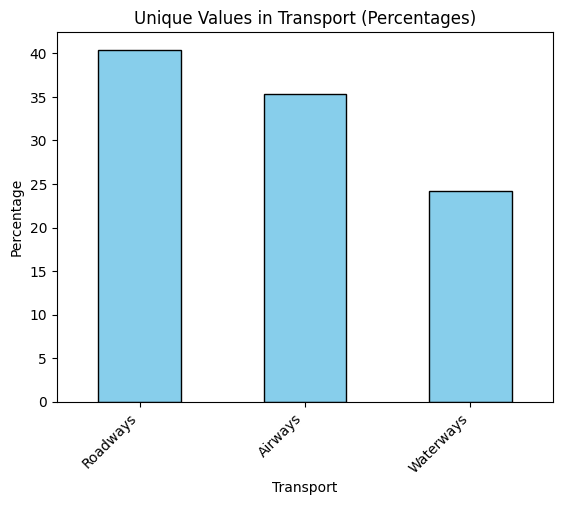

In [262]:
def plot_categorical_unique_values(df, column_label):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column
    value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
    value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
    
    
plot_categorical_unique_values(df=df, column_label="Transport")

In [263]:
df["Transport"].unique()

array(['Airways', 'Roadways', nan, 'Waterways'], dtype=object)

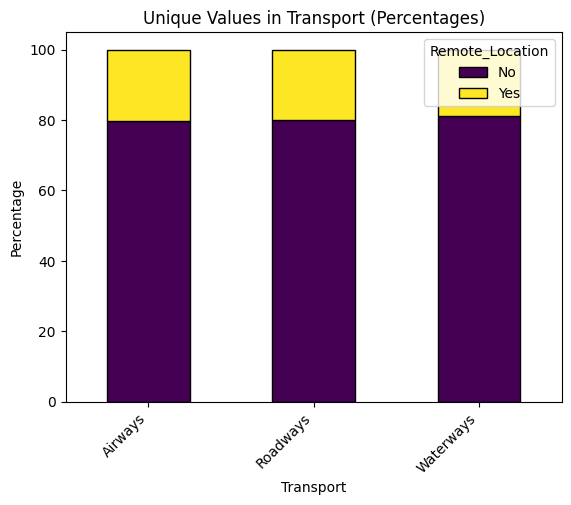

In [264]:
def plot_categorical_unique_values(df, column_label, hue_column=None):
    """
    Plot unique values in a specific categorical column along with their percentages.

    Parameters:
    - df: pandas DataFrame
    - column_label: Label of the categorical column to plot
    - hue_column: Optional, label of a second categorical column for coloring the bars
    """
    # Check if the specified column exists in the DataFrame
    if column_label not in df.columns:
        print(f"Column '{column_label}' not found in the DataFrame.")
        return

    # Check if the hue column exists
    if hue_column and hue_column not in df.columns:
        print(f"Hue column '{hue_column}' not found in the DataFrame.")
        return

    # Plot unique values for the specified categorical column with or without hue
    if hue_column:
        g = df.groupby([column_label, hue_column]).size().unstack()
        g = g.div(g.sum(axis=1), axis=0) * 100  # Convert to percentages
        g.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
    else:
        value_counts = df[column_label].value_counts(normalize=True) * 100  # Calculate percentages
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    # Set plot labels and title
    plt.title(f'Unique Values in {column_label} (Percentages)')
    plt.xlabel(column_label)
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


plot_categorical_unique_values(df, column_label="Transport", hue_column="Remote_Location")

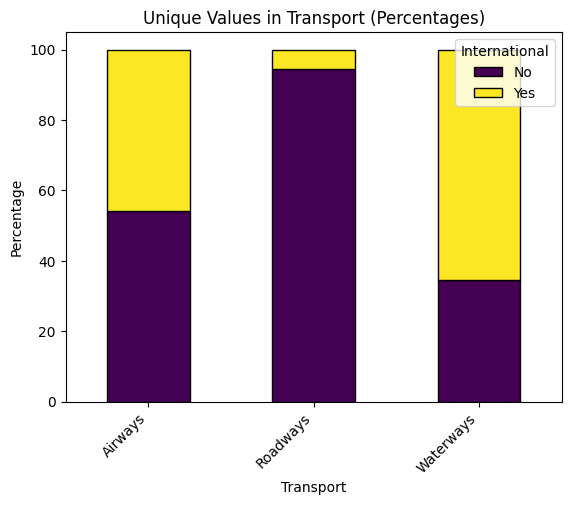

In [265]:
plot_categorical_unique_values(df, column_label="Transport", hue_column="International")

Shipping which are Domestic are majorly fullfilled by Roadways

Filling NA values in Transport column with Domestic Shipping as Roadways

In [266]:
def fill_transport_for_international_no(df, fill_value='Roadways'):
    """
    Fill NaN values in the "Transport" column with a specified value where "International" is "No".

    Parameters:
    - df: pandas DataFrame
    - fill_value: Value to fill in the "Transport" column (default is 'Roadways')

    Returns:
    - modified_df: DataFrame with NaN values filled in the "Transport" column
    """
    # Make a copy of the original DataFrame to avoid modifying it directly
    modified_df = df.copy()

    # Calculate the count of NaN values in "Transport" before the operation
    before_count = modified_df['Transport'].isna().sum()

    # Use boolean indexing to identify rows where "International" is "No" and "Transport" is NaN
    mask = (modified_df['International'] == 'No') & modified_df['Transport'].isna()

    # Fill NaN values in "Transport" with the specified value
    modified_df.loc[mask, 'Transport'] = fill_value

    # Calculate the count of NaN values in "Transport" after the operation
    after_count = modified_df['Transport'].isna().sum()

    # Print the count of NaN values before and after the operation
    print(f"NaN Count in 'Transport' before: {before_count}")
    print(f"NaN Count in 'Transport' after: {after_count}")

    return modified_df



df=fill_transport_for_international_no(df=df)

NaN Count in 'Transport' before: 1138
NaN Count in 'Transport' after: 357


In [267]:
df = df.dropna(subset=["Transport"])

Columns with Percentage of Missing Values:
Artist_Reputation: 10.13%
Height: 4.89%
Width: 7.90%
Weight: 7.86%
Remote_Location: 10.71%


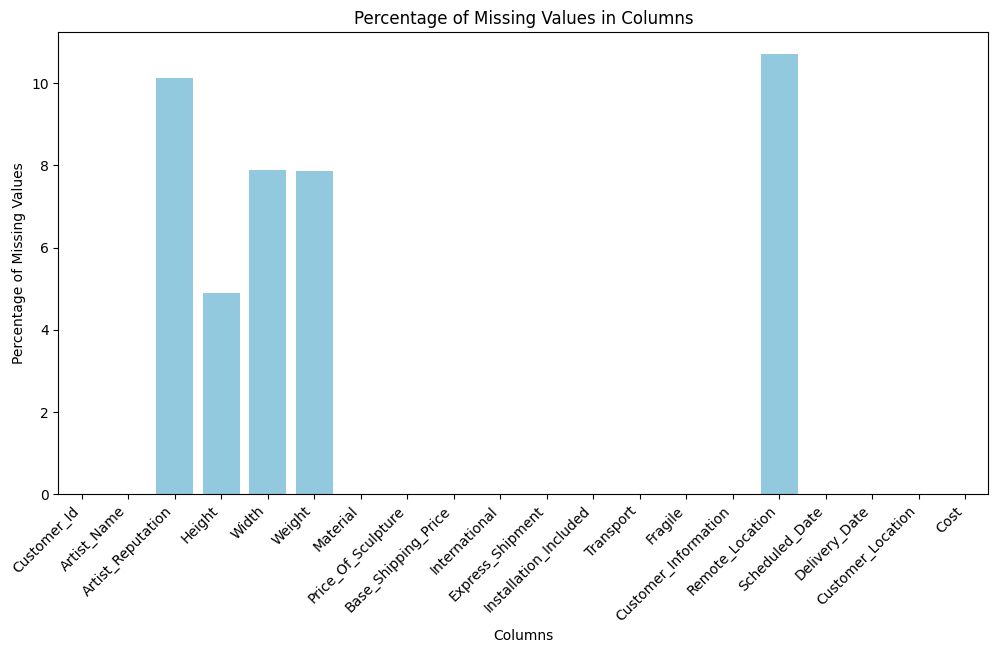

In [268]:
    
plot_missing_values(df=df)

In [269]:
df.shape

(5379, 20)

##### 










Remote Location

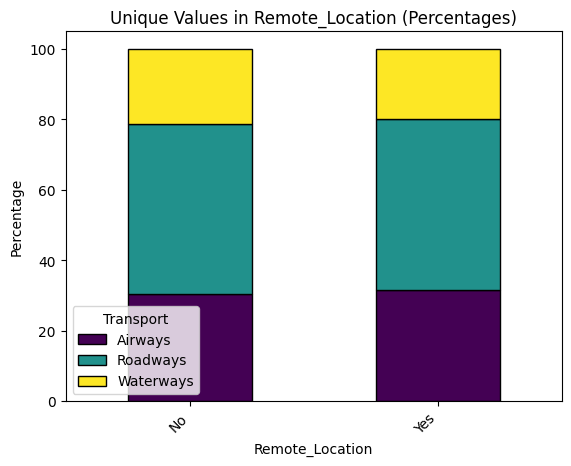

In [270]:
plot_categorical_unique_values(df, column_label="Remote_Location", hue_column="Transport")

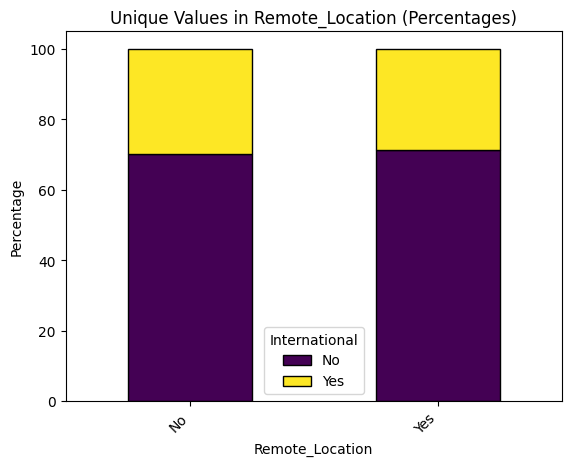

In [271]:
plot_categorical_unique_values(df, column_label="Remote_Location", hue_column="International")

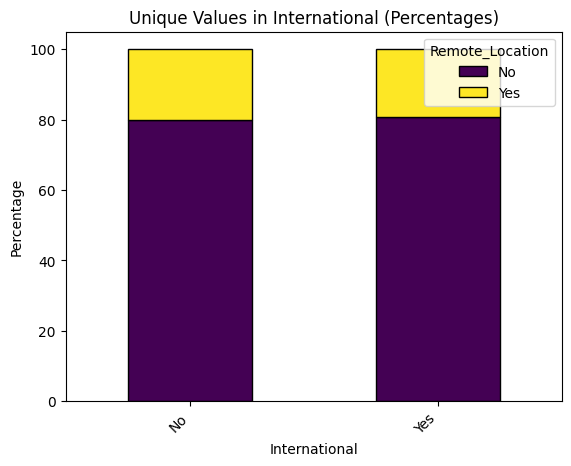

In [272]:
plot_categorical_unique_values(df, column_label="International", hue_column="Remote_Location")

##### Artist Reputation

In [273]:
df[["Artist_Reputation"]]

,Artist_Reputation
0,0.26
1,0.28
2,0.07
3,0.12
4,0.15
...,...
6493,NaN
6494,0.45
6495,0.37
6498,0.02


In [274]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Height', 'Width',
       'Weight', 'Material', 'Price_Of_Sculpture', 'Base_Shipping_Price',
       'International', 'Express_Shipment', 'Installation_Included',
       'Transport', 'Fragile', 'Customer_Information', 'Remote_Location',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

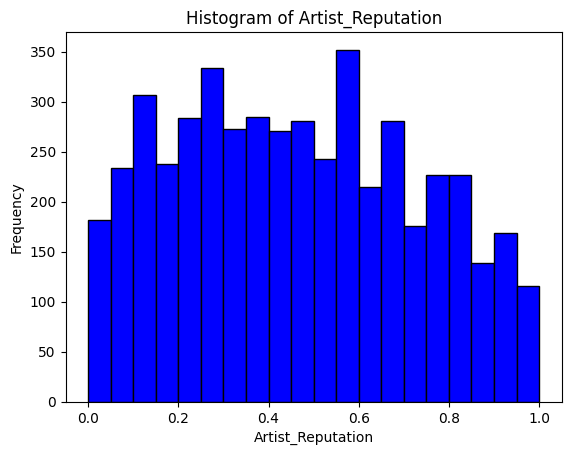

In [275]:
def plot_histogram(data_frame, column_label):
    """
    Plot a histogram for a specified column in a DataFrame.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the column for which to plot the histogram
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return

    # Plot histogram
    plt.hist(data_frame[column_label], bins=20, color='blue', edgecolor='black')
    
    # Add labels and title
    plt.xlabel(column_label)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_label}')
    
    # Show the plot
    plt.show()
    
    
plot_histogram(data_frame=df, column_label="Artist_Reputation")

In [276]:
def create_reputation_category_column(data_frame, column_label, bin_edges, bin_labels):
    """
    Replace the existing column with corresponding categories based on binning for artist reputation.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the column to replace with categorical values
    - bin_edges: List, the edges of the bins for binning the reputation values
    - bin_labels: List, the labels for the reputation categories

    Returns:
    - data_frame: Updated DataFrame with the existing column replaced by categorical values
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return data_frame.copy()  # Return a copy of the original DataFrame

    # Replace the existing column with corresponding categories based on binning
    data_frame[column_label] = pd.cut(data_frame[column_label], bins=bin_edges, labels=bin_labels, include_lowest=True)

    return data_frame


In [277]:
# Define bin edges and labels
reputation_bin_edges = [0, 0.3, 0.6, 0.9, 1.0]
reputation_bin_labels = ['Low_Reputation', 'Moderate_Reputation', 'High_Reputation', 'Very_High_Reputation']
# Use the function to add a new categorical column
df = create_reputation_category_column(df, 'Artist_Reputation', reputation_bin_edges, reputation_bin_labels)


In [278]:
df["Artist_Reputation"]

0            Low_Reputation
1            Low_Reputation
2            Low_Reputation
3            Low_Reputation
4            Low_Reputation
               ...         
6493                    NaN
6494    Moderate_Reputation
6495    Moderate_Reputation
6498         Low_Reputation
6499         Low_Reputation
Name: Artist_Reputation, Length: 5379, dtype: category
Categories (4, object): ['Low_Reputation' < 'Moderate_Reputation' < 'High_Reputation' < 'Very_High_Reputation']

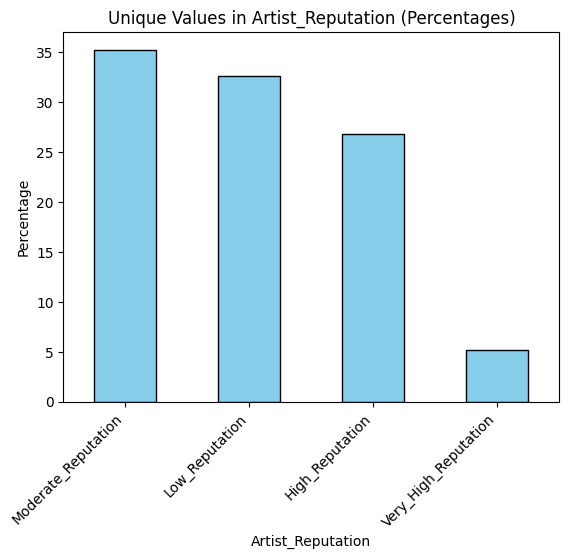

In [279]:
plot_categorical_unique_values(df=df,column_label="Artist_Reputation")

In [280]:
import numpy as np

In [281]:

def replace_nan_with_random_categories(data_frame, column_label):
    """
    Replace NaN values in a specified categorical column with random categories.

    Parameters:
    - data_frame: Pandas DataFrame
    - column_label: String, the label of the categorical column to replace NaN values

    Returns:
    - data_frame: Updated DataFrame with NaN values replaced by random categories
    """
    # Check if the column exists in the DataFrame
    if column_label not in data_frame.columns:
        print(f"Error: Column '{column_label}' not found in the DataFrame.")
        return data_frame.copy()  # Return a copy of the original DataFrame

    # Get the list of unique categories in the column
    categories = data_frame[column_label].dropna().unique()

    # Replace NaN values with random categories
    random_categories = np.random.choice(categories, size=data_frame[column_label].isnull().sum())
    data_frame.loc[data_frame[column_label].isnull(), column_label] = random_categories

    return data_frame

df=replace_nan_with_random_categories(data_frame=df, column_label="Artist_Reputation")

Columns with Percentage of Missing Values:
Height: 4.89%
Width: 7.90%
Weight: 7.86%
Remote_Location: 10.71%


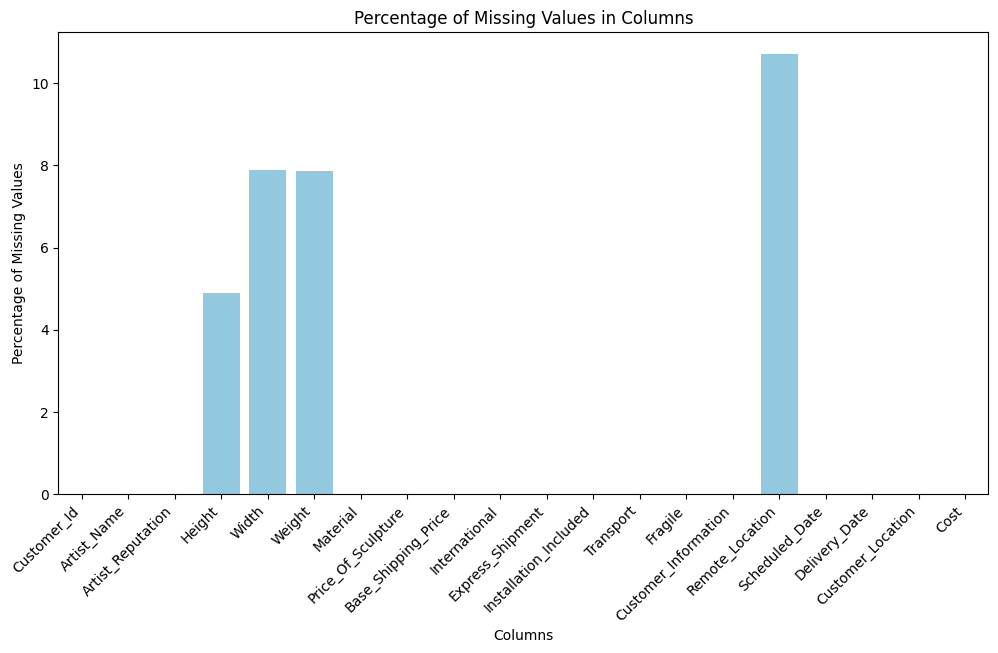

In [282]:
plot_missing_values(df=df)

#### Height and Width Columns

In [283]:
columns_to_drop=["Height","Width"]
df = df.drop(columns=columns_to_drop)

In [284]:
df

,Customer_Id,Artist_Name,Artist_Reputation,Weight,Material,Price_Of_Sculpture,Base_Shipping_Price,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Remote_Location,Scheduled_Date,Delivery_Date,Customer_Location,Cost
0,fffe3900350033003300,Billy Jenkins,Low_Reputation,4128.0,Brass,13.91,16.27,Yes,Yes,No,Airways,No,Working Class,No,06/07/15,06/03/15,"New Michelle, OH 50777",-283.29
1,fffe3800330031003900,Jean Bryant,Low_Reputation,61.0,Brass,6.83,15.00,No,No,No,Roadways,No,Working Class,No,03/06/17,03/05/17,"New Michaelport, WY 12072",-159.96
2,fffe3600370035003100,Laura Miller,Low_Reputation,237.0,Clay,4.96,21.18,No,No,No,Roadways,Yes,Working Class,Yes,03/09/15,03/08/15,"Bowmanshire, WA 19241",-154.29
3,fffe350031003300,Robert Chaires,Low_Reputation,NaN,Aluminium,5.81,16.31,No,No,No,Roadways,No,Wealthy,Yes,05/24/15,05/20/15,"East Robyn, KY 86375",-161.16
4,fffe3900320038003400,Rosalyn Krol,Low_Reputation,324.0,Aluminium,3.18,11.94,Yes,Yes,Yes,Airways,No,Working Class,No,12/18/16,12/14/16,"Aprilside, PA 52793",-159.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493,fffe350037003800,William Curry,High_Reputation,154.0,Wood,5.33,13.00,No,Yes,No,Airways,No,Wealthy,No,03/16/17,03/16/17,"Jerryland, CO 24340",174.57
6494,fffe3300370030003500,Karen Bayles,Moderate_Reputation,10851.0,Aluminium,30.83,67.70,No,No,Yes,Roadways,No,Working Class,No,04/19/16,04/21/16,"Singletonstad, MD 79303",1076.85
6495,fffe3800370037003300,Jeffrey Freudenthal,Moderate_Reputation,16551.0,Brass,28.28,38.46,Yes,Yes,No,Airways,No,Wealthy,Yes,03/28/18,03/25/18,"New Robert, VT 85335",872.43
6498,fffe3600350035003900,Daniel Drew,Low_Reputation,1269377.0,Stone,2929.13,69.76,No,Yes,No,Roadways,No,Working Class,Yes,03/10/19,03/12/19,"Hintonberg, UT 35006",5037.50


#### Material

In [285]:
df["Material"].unique()

array(['Brass', 'Clay', 'Aluminium', 'Wood', 'Marble', 'Bronze', 'Stone'],
      dtype=object)

In [286]:
df.columns

Index(['Customer_Id', 'Artist_Name', 'Artist_Reputation', 'Weight', 'Material',
       'Price_Of_Sculpture', 'Base_Shipping_Price', 'International',
       'Express_Shipment', 'Installation_Included', 'Transport', 'Fragile',
       'Customer_Information', 'Remote_Location', 'Scheduled_Date',
       'Delivery_Date', 'Customer_Location', 'Cost'],
      dtype='object')

#### Numerical and Categorical Columns

In [287]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=df)

In [288]:
numerical_labels

['Weight', 'Price_Of_Sculpture', 'Base_Shipping_Price', 'Cost']

In [289]:
categorical_labels

['Customer_Id',
 'Artist_Name',
 'Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

### Outlier

In [290]:
import numpy as np

In [291]:
class OutlierBoxPlotter:
    def __init__(self, df, numerical_columns):
        self.df = df
        self.numerical_columns = numerical_columns
        self.outliers = None
        self.filtered_df = None

    def plot_box_plot(self, title):
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title)
        plt.show()

    def identify_outliers(self, threshold=1.5):
        self.outliers = pd.DataFrame()

        for column in self.numerical_columns:
            q1 = np.percentile(self.df[column], 25)
            q3 = np.percentile(self.df[column], 75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = (self.df[column] < lower_bound) | (self.df[column] > upper_bound)
            self.outliers[column] = column_outliers

            # Print only count of outliers removed for each column
            outliers_removed = self.df[column][column_outliers]
            outliers_removed_count = outliers_removed.count()
            print(f"Count of outliers removed from '{column}': {outliers_removed_count}\n")

    def remove_outliers(self):
        if self.outliers is not None:
            self.filtered_df = self.df[~self.outliers.any(axis=1)]
            # Print shape before and after outlier removal
            print(f"Shape before outlier removal: {self.df.shape}")
            print(f"Shape after outlier removal: {self.filtered_df.shape}")
        else:
            print("Outliers not identified. Please run identify_outliers() first.")

    def plot_before_after(self, title_before, title_after):
        plt.figure(figsize=(15, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=self.df[self.numerical_columns])
        plt.title(title_before)

        plt.subplot(1, 2, 2)
        sns.boxplot(data=self.filtered_df[self.numerical_columns])
        plt.title(title_after)

        plt.show()

    def get_filtered_dataframe(self):
        if self.filtered_df is not None:
            return self.filtered_df
        else:
            print("Filtered DataFrame is not available. Please run remove_outliers() first.")
            return None

Count of outliers removed from 'Weight': 0

Count of outliers removed from 'Price_Of_Sculpture': 993

Count of outliers removed from 'Base_Shipping_Price': 0

Count of outliers removed from 'Cost': 976

Shape before outlier removal: (5379, 18)
Shape after outlier removal: (4204, 18)


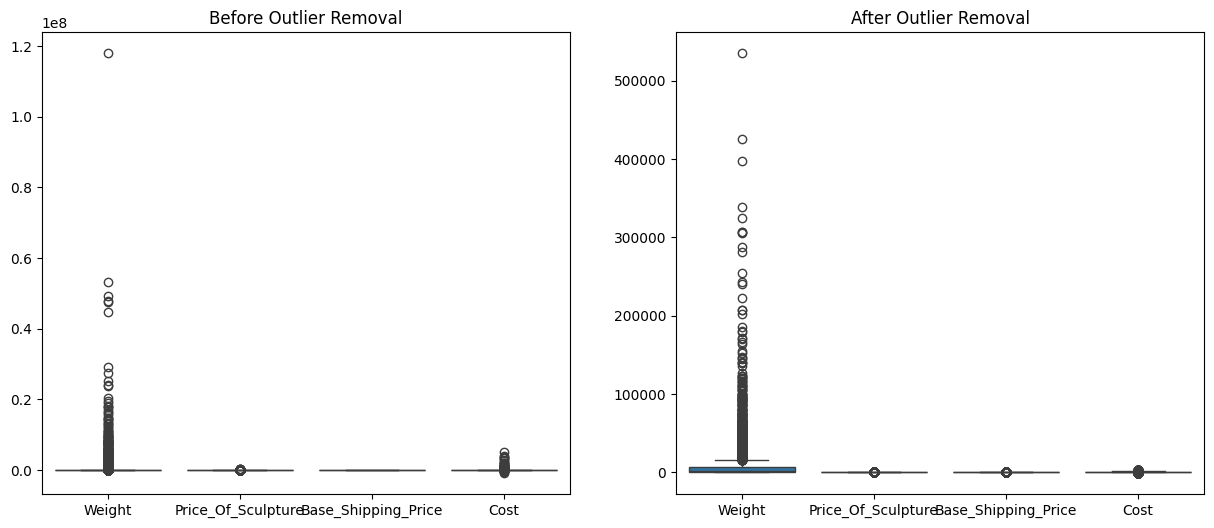

In [292]:
outlier_box_plotter = OutlierBoxPlotter(df,numerical_columns=numerical_labels)


# Identify outliers using default threshold (1.5)
outlier_box_plotter.identify_outliers()

# Remove outliers
outlier_box_plotter.remove_outliers()


# Plot both box plots side by side for comparison
outlier_box_plotter.plot_before_after("Before Outlier Removal", "After Outlier Removal")

In [293]:
df=outlier_box_plotter.get_filtered_dataframe()

#### Weight 

In [294]:
def mean_weight_by_material(dataframe, material_column, weight_column):
    """
    Find the mean of 'weight' values for each category in 'Material' column,
    excluding rows with NaN values in the 'weight' column.

    Parameters:
    - dataframe: pandas DataFrame
    - material_column: str, name of the categorical column 'Material'
    - weight_column: str, name of the column 'weight'

    Returns:
    - mean_by_material: pandas Series with the mean weight for each material category
    """
    # Drop rows with NaN values in the 'weight' column
    df_without_nan = dataframe.dropna(subset=[weight_column])

    # Group by 'Material' and calculate the mean of 'weight' for each category
    mean_by_material = df_without_nan.groupby(material_column)[weight_column].mean()
    
    print(f" {mean_by_material} ")

    return mean_by_material



mean_by_material=mean_weight_by_material(dataframe=df, material_column="Material", weight_column="Weight")

 Material
Aluminium     1312.229333
Brass        13274.631933
Bronze       10429.580165
Clay          2992.965926
Marble       35814.209836
Stone        40362.254386
Wood           402.005642
Name: Weight, dtype: float64 


In [295]:
# Replace NaN values in the "Weight" column with the corresponding values from the Series
df['Weight'] = df.apply(lambda row: mean_by_material[row['Material']] if pd.isna(row['Weight']) else row['Weight'], axis=1)


C:\Users\Hitesh\AppData\Local\Temp\ipykernel_7276\3106364727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df.apply(lambda row: mean_by_material[row['Material']] if pd.isna(row['Weight']) else row['Weight'], axis=1)


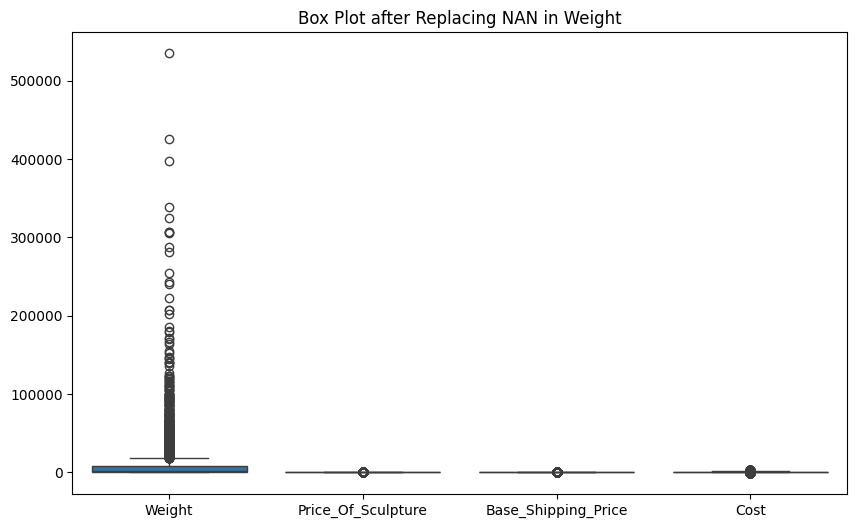

In [296]:
outlier_box_plotter = OutlierBoxPlotter(df,numerical_columns=numerical_labels)

outlier_box_plotter.plot_box_plot(title="Box Plot after Replacing NAN in Weight")

Columns with Percentage of Missing Values:
Remote_Location: 11.11%


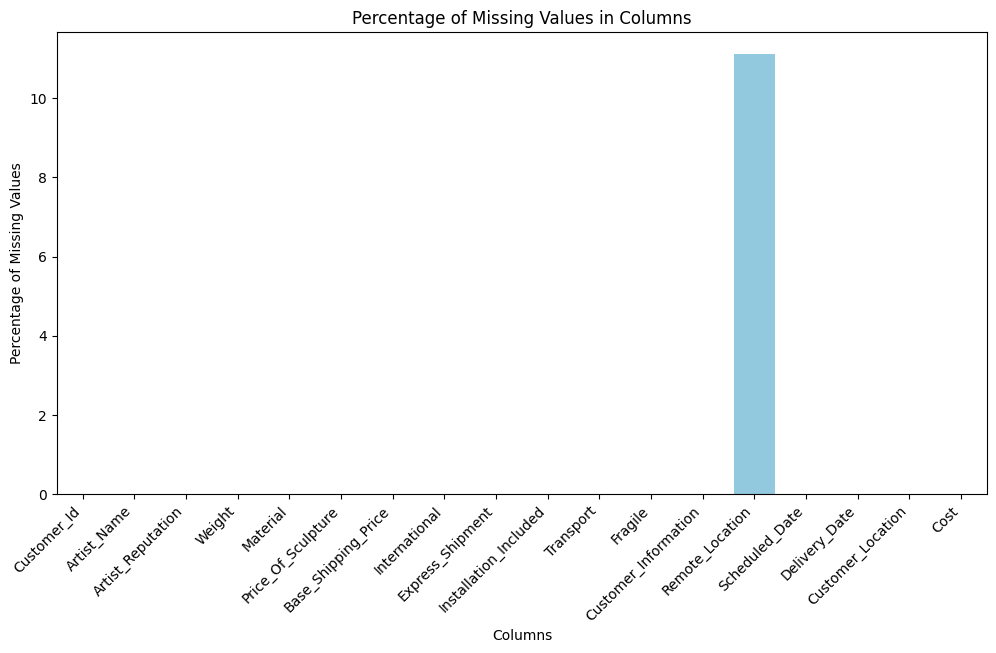

In [297]:
plot_missing_values(df=df)

In [298]:
df.shape

(4204, 18)

In [299]:
df=df.drop(columns=["Remote_Location"])

### Categorical

In [300]:
categorical_labels

['Customer_Id',
 'Artist_Name',
 'Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Remote_Location',
 'Scheduled_Date',
 'Delivery_Date',
 'Customer_Location']

#### Customer ID

In [301]:
df["Customer_Id"].nunique()

4204

#### Artist_Name

In [302]:
df["Artist_Name"].nunique()

4187

Dropping Artist_name and Customer_id

In [303]:
df=df.drop(columns=["Artist_Name","Customer_Id"])

#### Extract Location

Columns with Percentage of Missing Values:


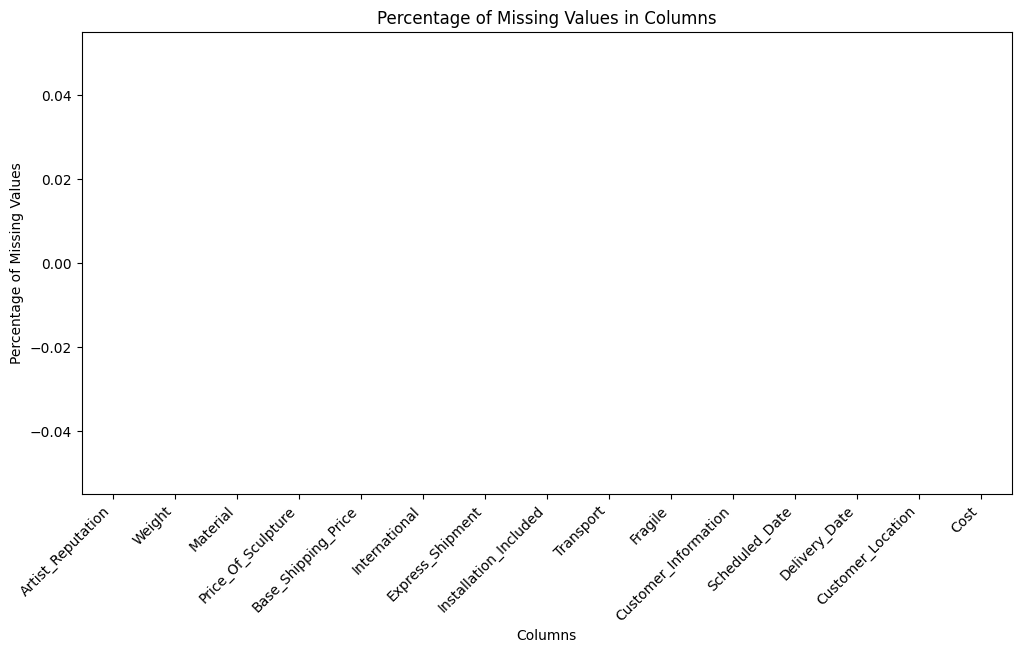

In [304]:
    
plot_missing_values(df=df)

In [305]:
import re

In [306]:

def extract_location_and_add_column(dataframe, column_label, new_column_label='Location', na_value='N/A'):
    # Check if the column exists in the DataFrame
    if column_label not in dataframe.columns:
        raise ValueError(f"Column '{column_label}' not found in the DataFrame.")

    # Use regular expression to extract the location from each row in the specified column
    extracted_locations = dataframe[column_label].apply(lambda x: re.search(r'^(.*?),', str(x)).group(1) if (pd.notna(x) and re.search(r'^(.*?),', str(x))) else na_value)

    # Add the new column to the DataFrame
    dataframe[new_column_label] = extracted_locations

    return dataframe

df=extract_location_and_add_column(dataframe=df,column_label="Customer_Location")

In [307]:
df.columns

Index(['Artist_Reputation', 'Weight', 'Material', 'Price_Of_Sculpture',
       'Base_Shipping_Price', 'International', 'Express_Shipment',
       'Installation_Included', 'Transport', 'Fragile', 'Customer_Information',
       'Scheduled_Date', 'Delivery_Date', 'Customer_Location', 'Cost',
       'Location'],
      dtype='object')

Dropping Date columns 

In [ ]:
df=df.drop(columns=["Customer_Location","Location"])

In [308]:
df=df.drop(columns=['Scheduled_Date', 'Delivery_Date'])

In [246]:
def save_dataframe_as_csv(dataframe, folder_name, file_name='output.csv'):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)

    # Construct the full path to the CSV file
    file_path = os.path.join(folder_name, file_name)

    # Save the DataFrame to CSV
    dataframe.to_csv(file_path, index=False)

    print(f"DataFrame saved as CSV: {file_path}")

save_dataframe_as_csv(dataframe=df, folder_name="Transformed_data", file_name='EDA.csv')

DataFrame saved as CSV: Transformed_data\EDA.csv


#### Train Test Split

In [247]:
# Exclude the 'Target' column from the features (X)
X = df.drop('Cost',axis=1)
y=df["Cost"]


# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [248]:
X_train.shape

(3363, 13)

In [249]:
X_test.shape

(841, 13)

In [250]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [180]:
def split_numerical_categorical_labels(df):
    """
    Identify and return labels of numerical and categorical columns in a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - numerical_labels: List of labels for numerical columns
    - categorical_labels: List of labels for categorical columns
    """
    # Identify numerical columns
    numerical_labels = list(df.select_dtypes(include=['number']).columns)

    # Identify categorical columns
    categorical_labels = list(df.select_dtypes(include=['object', 'category']).columns)

    return numerical_labels, categorical_labels


numerical_labels, categorical_labels = split_numerical_categorical_labels(df=X_train)

In [181]:
numerical_labels

['Weight', 'Price_Of_Sculpture', 'Base_Shipping_Price']

In [182]:
X_train[numerical_labels]

,Weight,Price_Of_Sculpture,Base_Shipping_Price
6383,149.0,6.51,14.47
4997,1252.0,3.82,17.11
164,163.0,3.19,13.89
1455,3723.0,11.97,18.72
2158,410.0,5.35,15.71
...,...,...,...
5368,348.0,5.13,22.11
780,916.0,6.43,20.73
4858,41.0,5.33,18.14
5851,141.0,5.21,12.76


In [183]:
categorical_labels

['Artist_Reputation',
 'Material',
 'International',
 'Express_Shipment',
 'Installation_Included',
 'Transport',
 'Fragile',
 'Customer_Information',
 'Customer_Location',
 'Location']

In [184]:
X_train[categorical_labels]

,Artist_Reputation,Material,International,Express_Shipment,Installation_Included,Transport,Fragile,Customer_Information,Customer_Location,Location
6383,Moderate_Reputation,Wood,No,Yes,No,Roadways,No,Wealthy,"East Lawrence, AR 61437",East Lawrence
4997,Moderate_Reputation,Clay,No,No,Yes,Roadways,Yes,Working Class,"East Katherine, IN 71179",East Katherine
164,Moderate_Reputation,Wood,No,No,Yes,Roadways,No,Working Class,"South Carloston, OH 25487",South Carloston
1455,Low_Reputation,Brass,No,No,No,Roadways,No,Working Class,"Dustinburgh, ID 44787",Dustinburgh
2158,Very_High_Reputation,Marble,No,Yes,Yes,Roadways,No,Working Class,"New Marvinville, MA 44047",New Marvinville
...,...,...,...,...,...,...,...,...,...,...
5368,Low_Reputation,Wood,No,No,Yes,Roadways,No,Working Class,"East Barbara, AR 36959",East Barbara
780,Moderate_Reputation,Aluminium,Yes,No,Yes,Airways,No,Working Class,FPO AA 55832,N/A
4858,Low_Reputation,Aluminium,No,No,No,Roadways,No,Wealthy,"Ryanside, TX 82867",Ryanside
5851,Low_Reputation,Aluminium,No,No,No,Roadways,No,Working Class,"Courtneybury, UT 21536",Courtneybury


### Numerical

#### Discrete 

In [185]:
def separate_discrete_continuous_data(df):
    """
    Separate a DataFrame into two DataFrames: one with discrete variables and one with continuous variables.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - discrete_data: DataFrame with discrete variable columns
    - continuous_data: DataFrame with continuous variable columns
    """
    # Separate columns based on data types
    discrete_data = df.select_dtypes(include=['object', 'category'])
    continuous_data = df.select_dtypes(include=['number'])

    return discrete_data, continuous_data


discrete_data, continuous_data=separate_discrete_continuous_data(df=X_train[numerical_labels])

#### Continuous 

In [186]:
continuous_data

,Weight,Price_Of_Sculpture,Base_Shipping_Price
6383,149.0,6.51,14.47
4997,1252.0,3.82,17.11
164,163.0,3.19,13.89
1455,3723.0,11.97,18.72
2158,410.0,5.35,15.71
...,...,...,...
5368,348.0,5.13,22.11
780,916.0,6.43,20.73
4858,41.0,5.33,18.14
5851,141.0,5.21,12.76


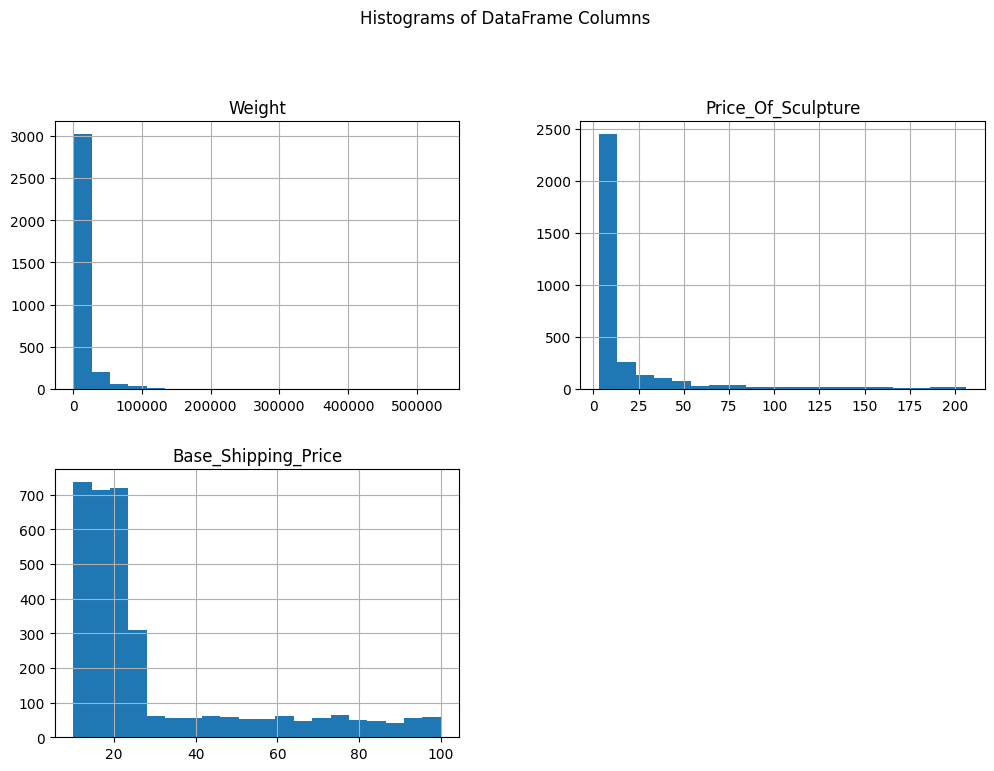

In [187]:
def plot_histograms(df):
    """
    Plot histograms for each column in a DataFrame.

    Parameters:
    - df: pandas DataFrame
    """
    # Use the hist method to plot histograms for all columns
    df.hist(figsize=(12, 8), bins=20)
    
    # Set plot labels and title
    plt.suptitle("Histograms of DataFrame Columns", y=1.02)
    plt.show()
    
    
plot_histograms(df=continuous_data)

### Categorical